In [11]:
from os import listdir
from os.path import join
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import os
import time
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np
from torchvision.transforms.functional import to_pil_image
from cv2 import cv2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [81]:
a_path = 'data/plates/train/a/'
b_path = 'data/plates/train/b/'
plates_a = listdir(a_path)

a = cv2.imread(a_path + plates_a[1])

In [82]:
b = a.copy()

dst0 = cv2.bilateralFilter(b, 5, 20, 20)
dst1 = cv2.GaussianBlur(dst0, (3,3), 5,5)
canny = cv2.Canny(b, 50, 125)
b = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)

(-0.5, 237.5, 72.5, -0.5)

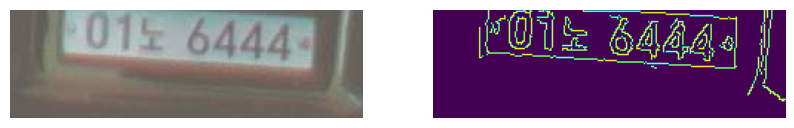

In [84]:
import matplotlib.cm as cm
# 샘플 이미지 확인하기
# a,b = train_ds[0]
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(to_pil_image(a))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(to_pil_image(canny))
plt.axis('off')

In [85]:
from tqdm.auto import tqdm

for img in tqdm(listdir(a_path)):
    a = cv2.imread(a_path + img)
    dst0 = cv2.bilateralFilter(a, 5, 20, 20)
    dst1 = cv2.GaussianBlur(dst0, (3,3), 5,5)
    canny = cv2.Canny(a, 50, 125)
    b = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
    cv2.imwrite(b_path + img, b)

  0%|          | 0/80000 [00:00<?, ?it/s]